Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

 

Firstly Importing important libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data set 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.shape

(1599, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# checking null values in the dataset

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# observation:- no null values in our dataset

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
# obserations:- there is a quite bit of variations in mean, std, min

Visualizing and graphing our data

In [15]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
df['quality'].count()

1599

In [20]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

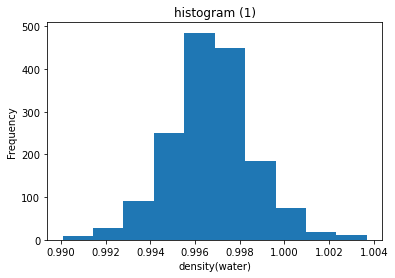

In [21]:
d = df['density']
bins = 10


plt.hist(d,bins)
plt.title("histogram (1)")
plt.xlabel("density(water)")
plt.ylabel("Frequency")
plt.show()

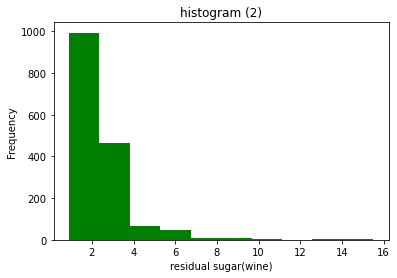

In [22]:
r = df['residual sugar']
bins = 10


plt.hist(r,bins,color = "green")
plt.title("histogram (2)")
plt.xlabel("residual sugar(wine)")
plt.ylabel("Frequency")
plt.show()

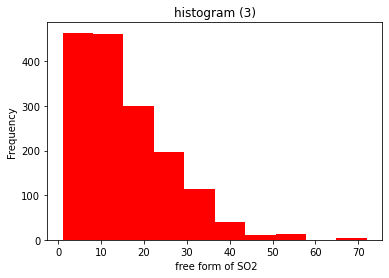

In [23]:
fsd = df['free sulfur dioxide']
bins = 10


plt.hist(fsd,bins,color = "red")
plt.title("histogram (3)")
plt.xlabel(" free form of SO2")
plt.ylabel("Frequency")
plt.show()

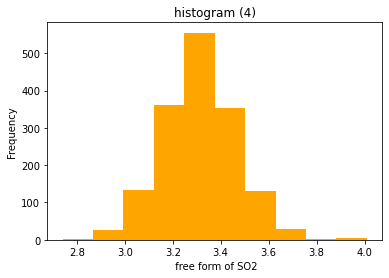

In [24]:
ph = df['pH']
bins = 10


plt.hist(ph,bins,color = "orange")
plt.title("histogram (4)")
plt.xlabel(" free form of SO2")
plt.ylabel("Frequency")
plt.show()

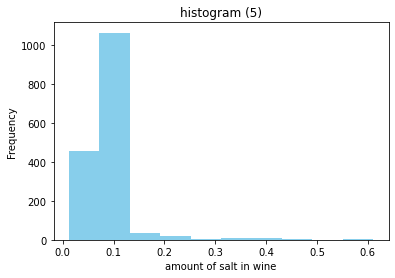

In [25]:
cl = df['chlorides']
bins = 10


plt.hist(cl,bins,color = "skyblue")
plt.title("histogram (5)")
plt.xlabel("amount of salt in wine")
plt.ylabel("Frequency")
plt.show()

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

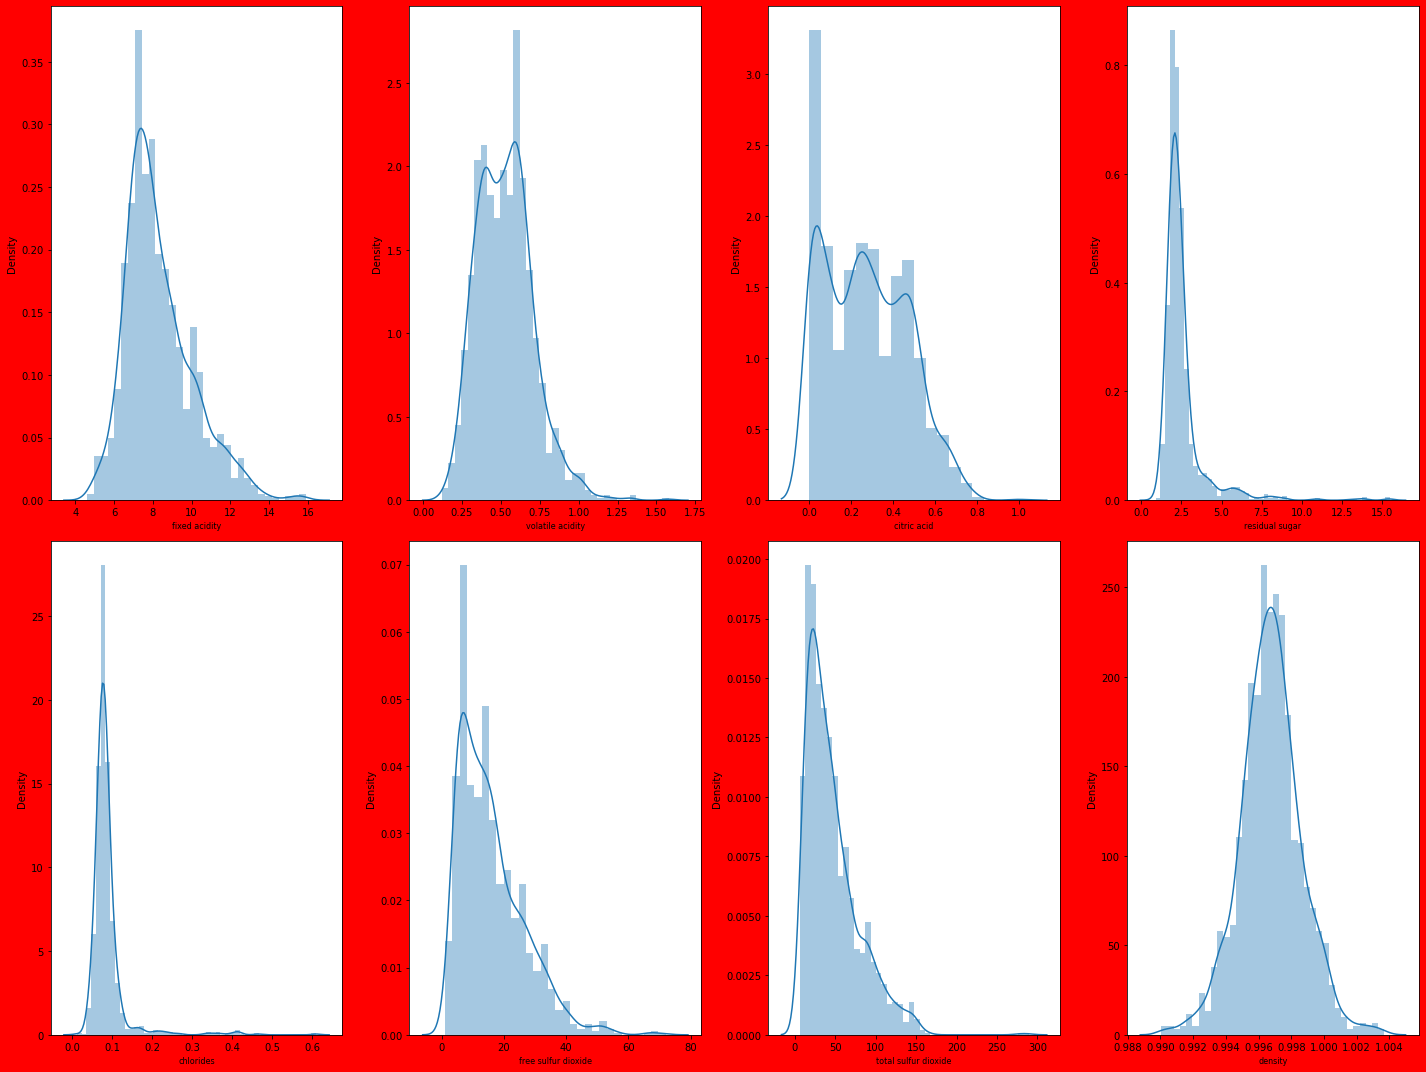

In [28]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber <=8:
     ax = plt.subplot(2,4,plotnumber)
     sns.distplot(df[column])
     plt.xlabel(column,fontsize=8)
    
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='quality', ylabel='count'>

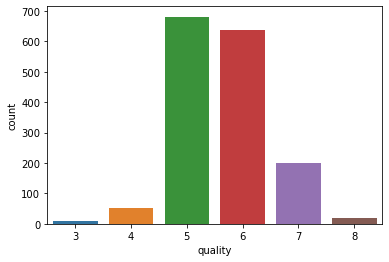

In [29]:
sns.countplot(x='quality',data=df)

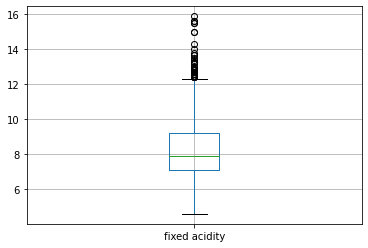

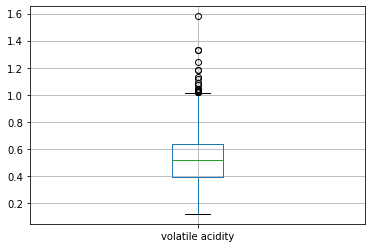

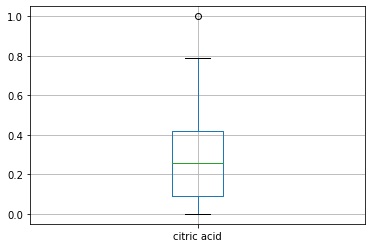

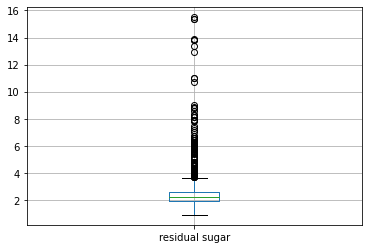

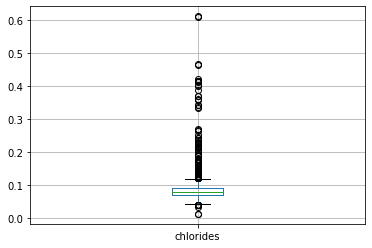

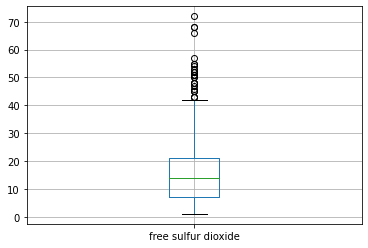

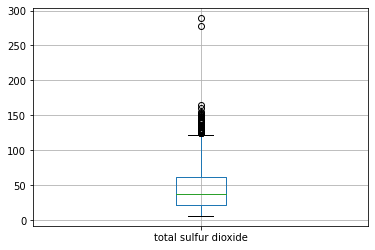

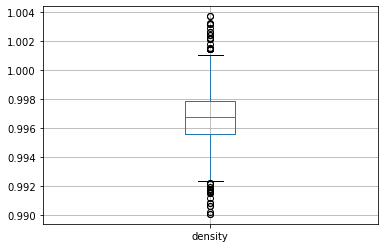

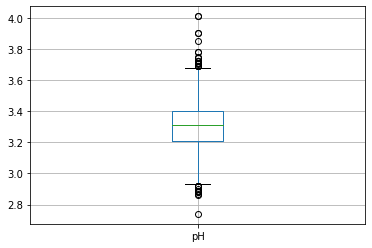

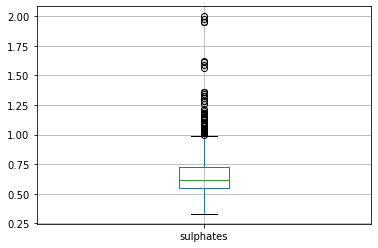

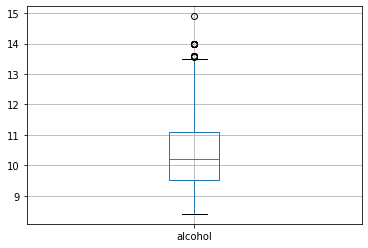

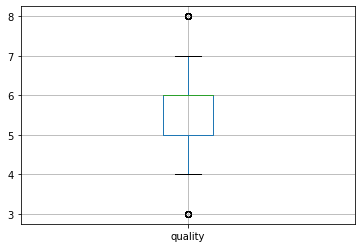

In [40]:
for quality in df:
    plt.figure()
    df.boxplot([quality])

In [45]:
#scatter plot using matplotlib

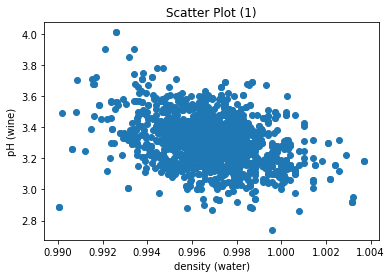

In [46]:
d = df["density"]
ph = df["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot (1)")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

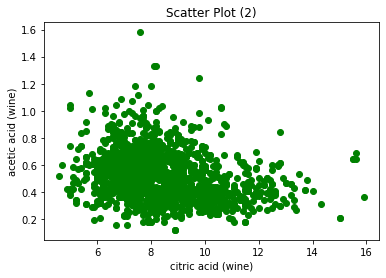

In [60]:
ca = df["fixed acidity"]
va = df["volatile acidity"]

plt.scatter(ca, va,color = 'green')
plt.title("Scatter Plot (2)")
plt.xlabel("citric acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

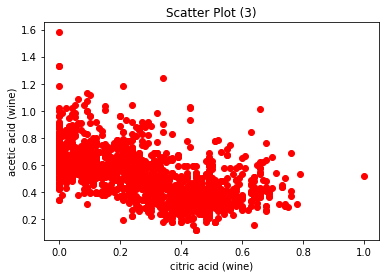

In [61]:
ca = df["citric acid"]
va = df["volatile acidity"]

plt.scatter(ca, va,color = 'red')
plt.title("Scatter Plot (3)")
plt.xlabel("citric acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

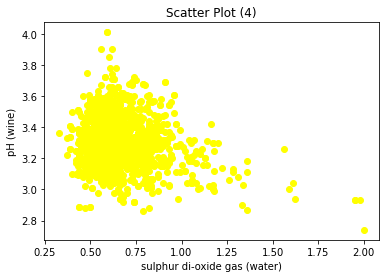

In [62]:
sl = df["sulphates"]
ph = df["pH"]

plt.scatter(sl, ph,color = 'yellow')
plt.title("Scatter Plot (4)")
plt.xlabel("sulphur di-oxide gas (water)")
plt.ylabel("pH (wine)")
plt.show()

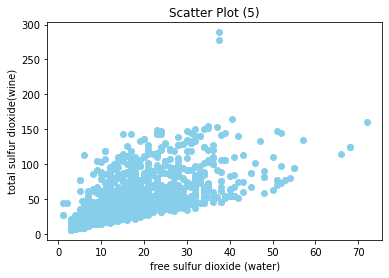

In [63]:
fsd = df["free sulfur dioxide"]
tsd = df["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'skyblue')
plt.title("Scatter Plot (5)")
plt.xlabel("free sulfur dioxide (water)")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

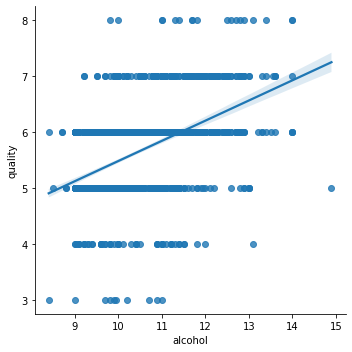

In [70]:
sns.lmplot(x='alcohol',y='quality',data=df)

In [77]:
df['quality'] = [1 if x >= 7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [86]:
x=df.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [78]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [79]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

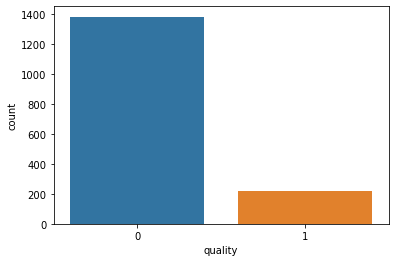

In [80]:
sns.countplot(df.quality)

In [81]:
from imblearn.over_sampling import SMOTE

In [87]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [88]:
trainx.value_counts

<bound method DataFrame.value_counts of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.700000     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
2759       7.400106          0.359998     0.340025        1.800381   0.075001   
2760       7.074686          0.514111     0.194686        2.125314   0.075158   
2761       9.516945          0.353066     0.474437        2.795986   0.077097   
2762      10.149275          0.327174     0.610905        3.635318   0.079641   
2763       8.925706          0.355141     0.408569        3.505745   

In [89]:
trainy.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

<AxesSubplot:ylabel='count'>

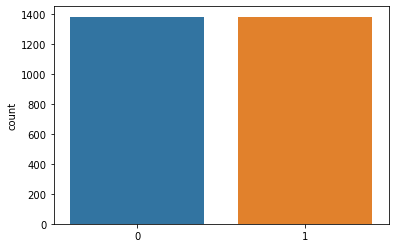

In [90]:
sns.countplot(trainy.values)

In [91]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


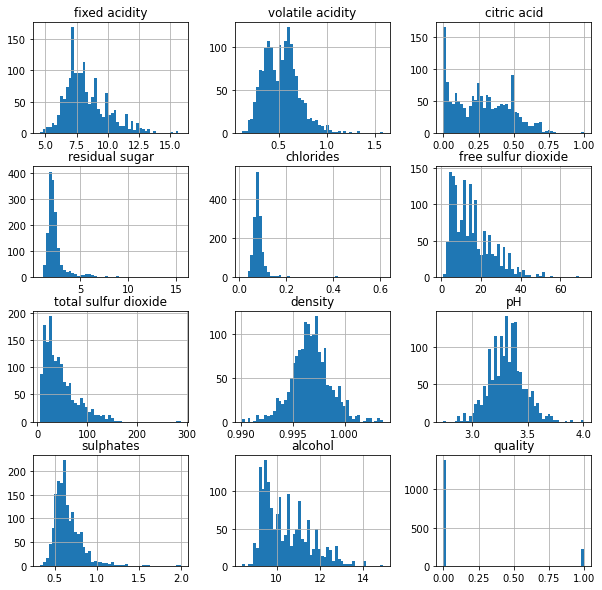

In [92]:
df.hist(figsize=(10,10),bins=50)
plt.show()

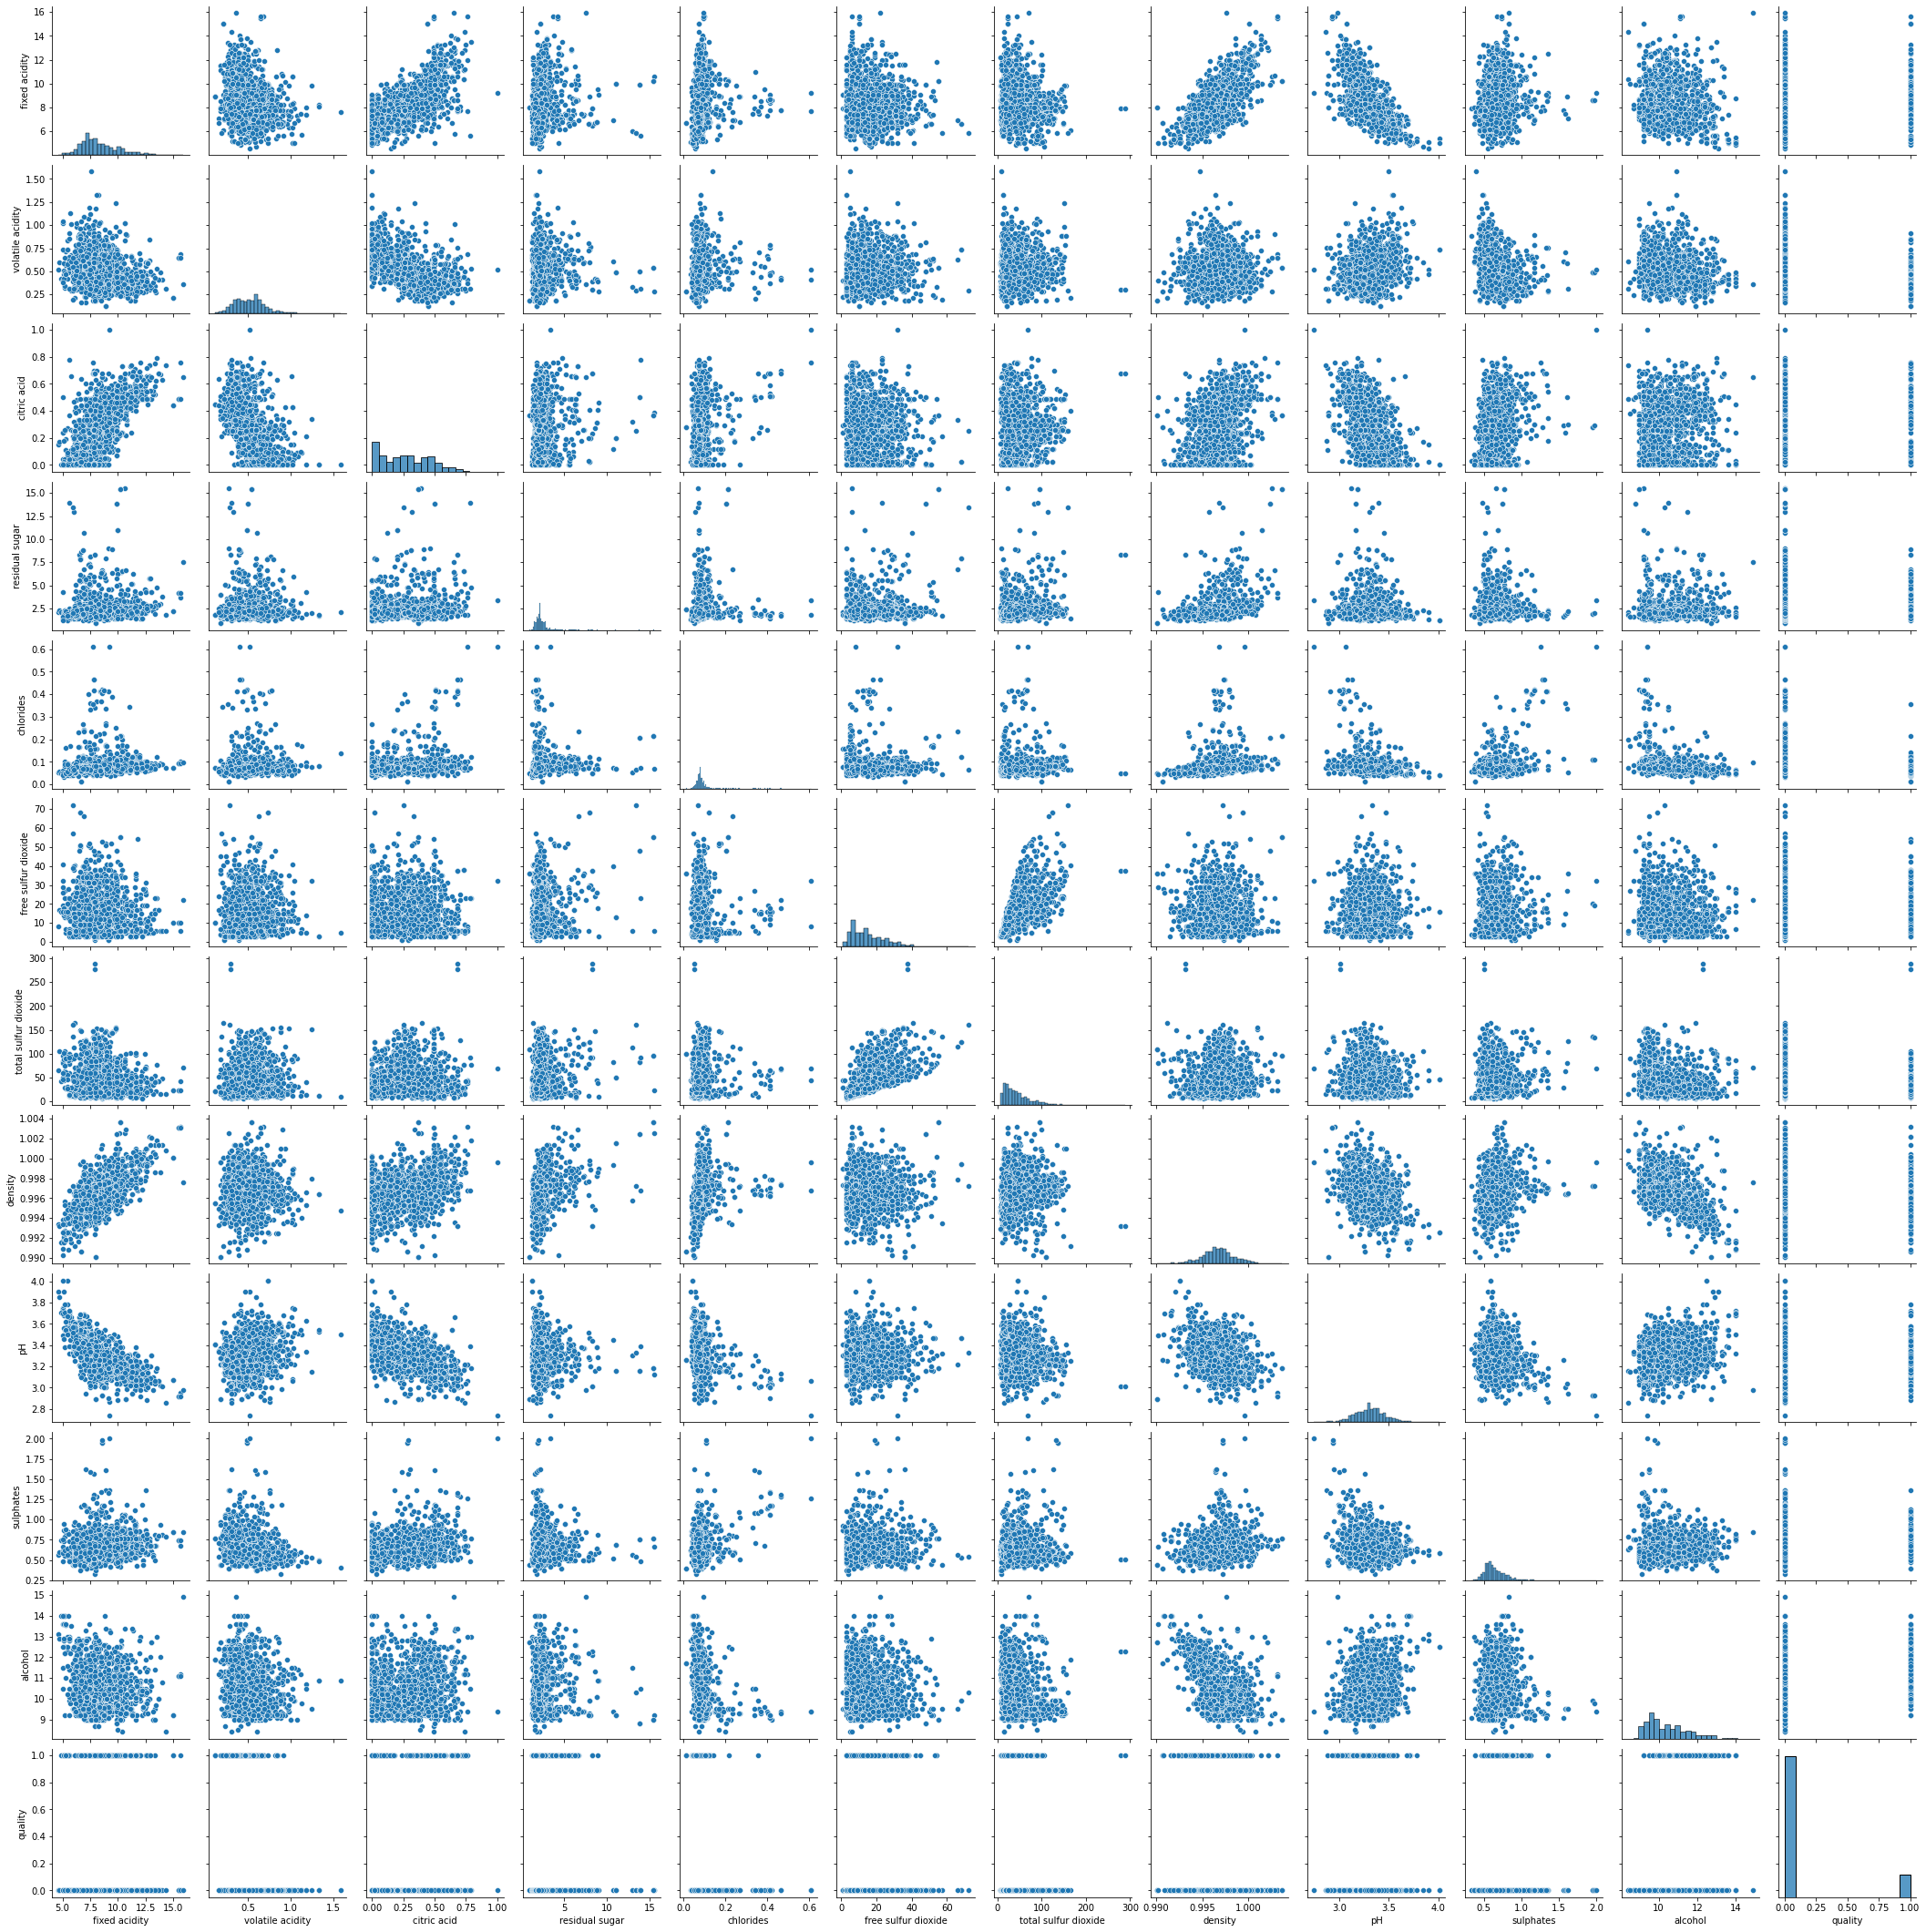

In [93]:
sns.pairplot(df)

<AxesSubplot:>

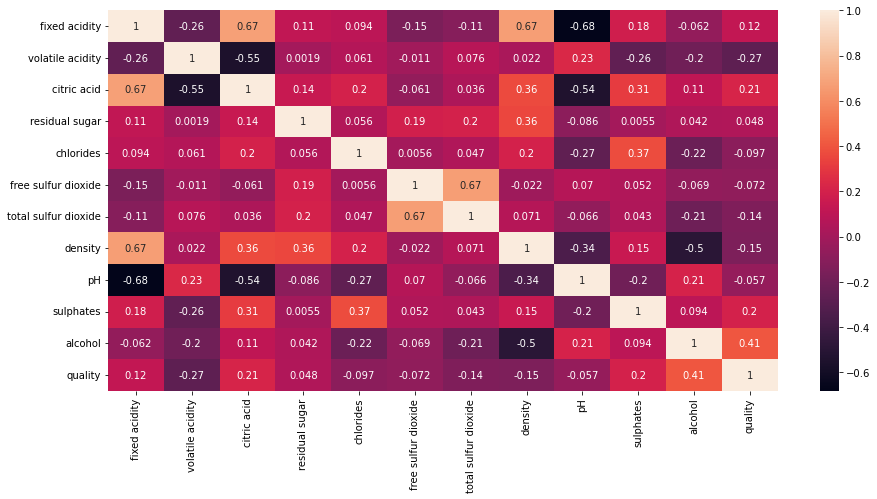

In [94]:
# correlation by visualization
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

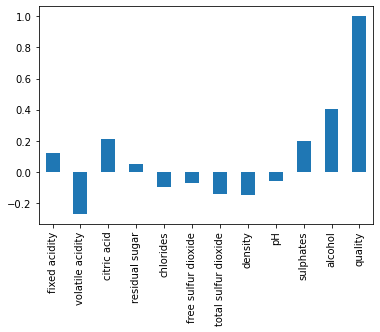

In [95]:
#Correlation with Quality with respect to attributes
df.corrwith(df.quality).plot.bar()

In [96]:
df.drop(['volatile acidity'],axis=1)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot:>

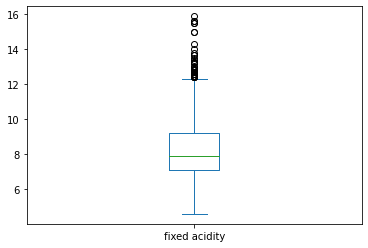

In [97]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

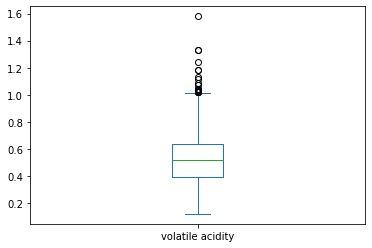

In [98]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

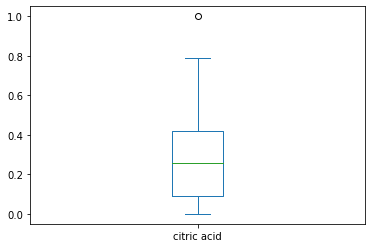

In [99]:
df['citric acid'].plot.box()

<AxesSubplot:>

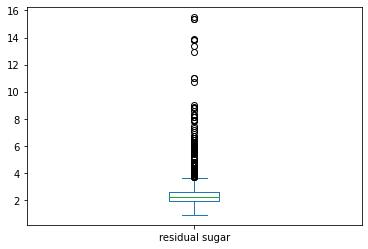

In [100]:
df['residual sugar'].plot.box()

<AxesSubplot:>

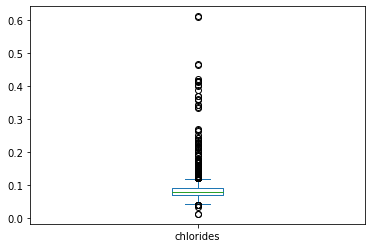

In [101]:
df['chlorides'].plot.box()

<AxesSubplot:>

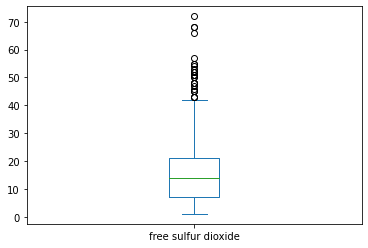

In [102]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

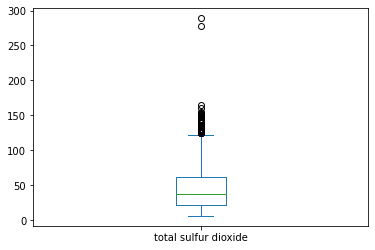

In [103]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

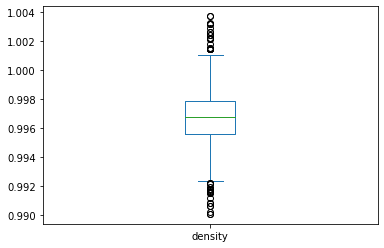

In [104]:
df['density'].plot.box()

<AxesSubplot:>

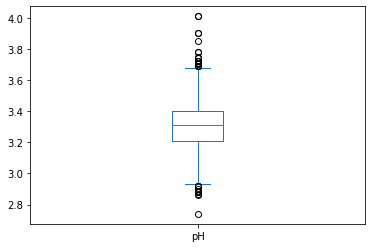

In [105]:
df['pH'].plot.box()

<AxesSubplot:>

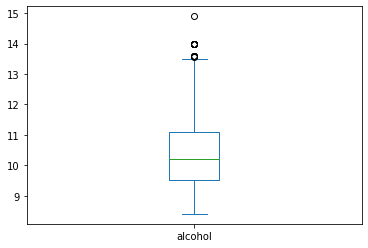

In [106]:
df['alcohol'].plot.box()

In [107]:
collist=df.columns.values
ncol=30
nrows=14

In [108]:
collist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

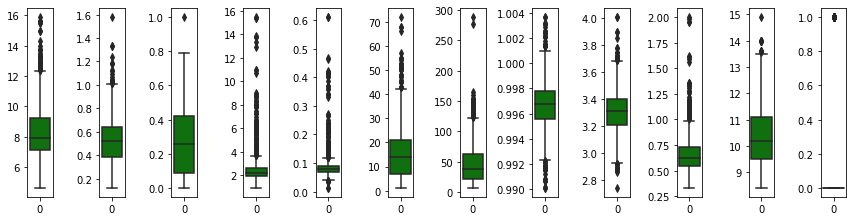

In [109]:
plt.figure(figsize=(ncol,3*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [110]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [111]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [112]:
df.shape

(1599, 12)

In [113]:
df_new.shape

(1458, 12)

In [114]:
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old Dataframe (1599, 12)
New Dataframe (1458, 12)
total_dropped_rows 141


In [115]:
loss_percent=(1599-1458)/1599*100
print(loss_percent,'%')

8.818011257035648 %


In [116]:
df=df_new.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [117]:
df.shape

(1458, 12)

In [118]:
x.shape

(1599, 11)

In [119]:
y.shape

(1599,)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [121]:
train_X,test_X,train_Y,test_Y=train_test_split(trainx,trainy,test_size=0.20,random_state=45)
train_X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
462,11.000000,0.260000,0.680000,2.550000,0.085000,10.000000,25.000000,0.997000,3.180000,0.610000,11.800000
388,7.800000,0.460000,0.260000,1.900000,0.088000,23.000000,53.000000,0.998100,3.430000,0.740000,9.200000
1374,6.800000,0.815000,0.000000,1.200000,0.267000,16.000000,29.000000,0.994710,3.320000,0.510000,9.800000
1828,10.124249,0.527197,0.516741,2.456062,0.085432,29.719689,53.121243,0.996727,3.178788,0.768409,11.740155
2317,8.659215,0.461285,0.360335,4.998884,0.068581,10.284917,19.430165,0.996987,3.359944,0.733017,11.801116
...,...,...,...,...,...,...,...,...,...,...,...
163,7.400000,0.600000,0.260000,7.300000,0.070000,36.000000,121.000000,0.998200,3.370000,0.490000,9.400000
607,8.800000,0.480000,0.410000,3.300000,0.092000,26.000000,52.000000,0.998200,3.310000,0.530000,10.500000
1916,9.374942,0.219770,0.504697,2.187471,0.076833,47.386206,85.878928,0.996555,3.322046,0.760000,11.508353
1667,8.698520,0.367152,0.481751,1.909494,0.123922,6.270037,16.000000,0.994240,3.188101,0.733798,12.500000


In [122]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_X,train_Y)
Y_pred = lg.predict(test_X)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(test_Y,Y_pred))

Accuracy Score: 0.8137432188065099


In [123]:
print(confusion_matrix(test_Y,Y_pred))

[[200  55]
 [ 48 250]]


In [124]:
print(classification_report(test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       255
           1       0.82      0.84      0.83       298

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X,train_Y)
y_pred = knn.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.8788426763110307


In [126]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X,train_Y)
pred_y = svc.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.8788426763110307


In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
dtc.fit(train_X,train_Y)
y_pred = dtc.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.9312839059674503


In [129]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_X,train_Y)
y_pred = gnb.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.8028933092224232


In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,n_estimators=100)
rfc.fit(train_X,train_Y)
y_pred = rfc.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.945750452079566


In [131]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20,learning_rate=1.0)
ab.fit(train_X,train_Y)
y_pred = ab.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.9132007233273056


In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_X,train_Y)
y_pred = gb.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.9077757685352622


In [133]:
from sklearn.ensemble import VotingClassifier

In [134]:
estimator=[]
estimator.append(('svc',SVC()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('rfc',RandomForestClassifier()))


In [135]:
estimator

[('svc', SVC()),
 ('dtc', DecisionTreeClassifier()),
 ('rfc', RandomForestClassifier())]

In [136]:
vot_hard = VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(train_X,train_Y)
y_pred = vot_hard.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

Accuracy Score: 0.9294755877034359


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model=SVC()
dict1={'kernel':['rbf','poly','linear'],'gamma':['scale','auto'],'C':[1.0,10]}
gd=GridSearchCV(estimator=model,param_grid=dict1,cv=5)
gd.fit(x,y)

NameError: name 'x' is not defined

In [4]:
gd.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [5]:
gd.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [6]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
pred_y = svc.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

NameError: name 'train_X' is not defined

In [7]:
dtc=DecisionTreeClassifier()
params={'criterion':['gini','entropy']}

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
grd=GridSearchCV(estimator=dtc,param_grid=params,cv=5)

In [ ]:
grd.fit(x,y)

In [ ]:
grd.best_params_

In [ ]:
grd.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
dtc.fit(train_X,train_Y)
y_pred = dtc.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_Y,y_pred))

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Ada Boost'],
    'Score': [0.870,0.898,0.913,0.924,0.813,0.951,0.913]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df